In [105]:
import numpy as np
import pandas as pd 
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
data = pd.read_csv("breast-cancer.csv")
df = data.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

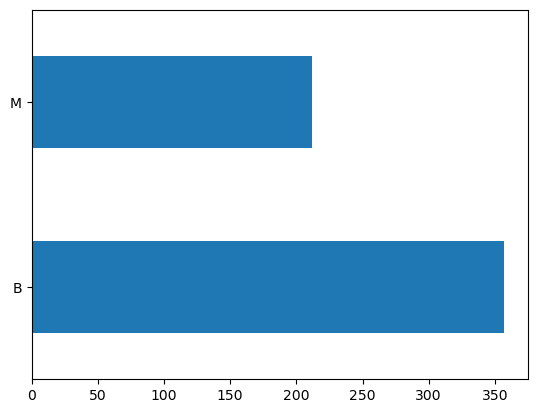

In [12]:
df["diagnosis"].value_counts().plot.barh();

In [13]:
y = df["diagnosis"]
X = df.drop(["diagnosis" , "id"] , axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 42)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train , y_train)

In [51]:
loj_model

LogisticRegression(solver='liblinear')

In [52]:
loj_model.intercept_

array([-0.38623122])

In [53]:
loj_model.coef_

array([[-2.1432316 , -0.16047218,  0.13168881,  0.00323607,  0.12179068,
         0.41365265,  0.63378903,  0.32514641,  0.1898723 ,  0.03052543,
         0.04616341, -1.47307877, -0.16883814,  0.11492394,  0.01284213,
         0.03816277,  0.07284897,  0.03832558,  0.04621141,  0.00246399,
        -1.23612404,  0.39438729,  0.08081471,  0.02166684,  0.2255297 ,
         1.18349814,  1.56521874,  0.58255425,  0.68221543,  0.11625864]])

In [54]:
y_pred = loj_model.predict(X_test)

In [55]:
confusion_matrix(y_test , y_pred)

array([[106,   2],
       [  4,  59]], dtype=int64)

In [56]:
accuracy_score(y_test , y_pred)

0.9649122807017544

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [58]:
loj_model.predict(X)[0:10]

array(['M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [59]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[4.79616347e-14, 1.00000000e+00],
       [1.12422101e-07, 9.99999888e-01],
       [9.77047088e-08, 9.99999902e-01],
       [5.82277719e-01, 4.17722281e-01],
       [1.35977964e-05, 9.99986402e-01],
       [2.50006060e-01, 7.49993940e-01],
       [5.00325070e-06, 9.99994997e-01],
       [2.54100988e-02, 9.74589901e-01],
       [9.94668989e-02, 9.00533101e-01],
       [1.98315090e-03, 9.98016849e-01]])

In [60]:
y[0:10]

0    M
1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: diagnosis, dtype: object

In [61]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [62]:
y_probs[0:10]

array([1.        , 0.99999989, 0.9999999 , 0.41772228, 0.9999864 ,
       0.74999394, 0.999995  , 0.9745899 , 0.9005331 , 0.99801685])

In [63]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [64]:
y_pred[0:10]

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [66]:
confusion_matrix(y_test.replace({"B":0, "M":1}) , y_pred[0:171])

array([[57, 51],
       [34, 29]], dtype=int64)

In [68]:
accuracy_score(y_test.replace({"B":0, "M":1}) , y_pred[0:171])

0.5029239766081871

In [69]:
print(classification_report(y_test.replace({"B":0, "M":1}) , y_pred[0:171]))

              precision    recall  f1-score   support

           0       0.63      0.53      0.57       108
           1       0.36      0.46      0.41        63

    accuracy                           0.50       171
   macro avg       0.49      0.49      0.49       171
weighted avg       0.53      0.50      0.51       171



In [70]:
loj_model.predict_proba(X)[:,1][0:5]

array([1.        , 0.99999989, 0.9999999 , 0.41772228, 0.9999864 ])

In [71]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9532679738562091

# Gaussian Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb = GaussianNB()
nb_model = nb.fit(X_train , y_train)
nb_model

GaussianNB()

In [78]:
nb_model.predict(X_test)[0:20]

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M'], dtype='<U1')

In [79]:
nb_model.predict_proba(X_test)[0:20]

array([[9.99999998e-001, 2.32993642e-009],
       [9.09364797e-062, 1.00000000e+000],
       [2.16393522e-010, 1.00000000e+000],
       [1.00000000e+000, 1.38690278e-011],
       [1.00000000e+000, 2.03333158e-014],
       [2.27217166e-107, 1.00000000e+000],
       [1.03858765e-137, 1.00000000e+000],
       [4.07619136e-020, 1.00000000e+000],
       [6.44524396e-001, 3.55475604e-001],
       [1.00000000e+000, 2.86858591e-013],
       [1.00000000e+000, 8.25406376e-013],
       [2.37580331e-018, 1.00000000e+000],
       [1.00000000e+000, 3.19695094e-011],
       [7.62344427e-011, 1.00000000e+000],
       [1.00000000e+000, 1.01213415e-013],
       [3.64933590e-041, 1.00000000e+000],
       [1.00000000e+000, 2.48332661e-012],
       [1.00000000e+000, 5.91730810e-017],
       [1.00000000e+000, 5.04356297e-014],
       [5.25771215e-069, 1.00000000e+000]])

In [80]:
y_pred = nb_model.predict(X_test)

In [81]:
accuracy_score(y_test , y_pred)

0.9415204678362573

In [82]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9352941176470587

# KNN

In [84]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train , y_train)
knn_model

KNeighborsClassifier()

In [85]:
y_pred = knn_model.predict(X_test)

In [86]:
accuracy_score(y_test , y_pred)

0.9590643274853801

In [87]:
cross_val_score(knn_model, X_test, y_test, cv = 10).mean()

0.9705882352941175

# Model Tuning

In [88]:
knn_params = {"n_neighbors" : np.arange(1,50)}

In [94]:
knn = KNeighborsClassifier()

In [90]:
knn_cv = GridSearchCV(knn , knn_params , cv = 10)

In [91]:
knn_cv.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [92]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.9144871794871795
En iyi parametreler: {'n_neighbors': 6}


In [95]:
knn = KNeighborsClassifier(6)
knn_tuned = knn.fit(X_train, y_train)

In [97]:
y_pred = knn_tuned.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred)

0.9532163742690059

# SVC

In [100]:
from sklearn.svm import SVC

In [103]:
svm_model = SVC(kernel = "linear").fit(X_train , y_train)

In [104]:
svm_model

SVC(kernel='linear')

In [105]:
y_pred = svm_model.predict(X_test)

In [106]:
accuracy_score(y_test , y_pred)

0.9649122807017544

# Model Tuning

In [109]:
svc_params = {"C" : np.arange(1,10)}
svc = SVC(kernel = "linear")
svc_cv_model = GridSearchCV(svc , svc_params , cv = 10 , 
                           n_jobs = -1 , verbose = 2)
svc_cv_model.fit(X_train , y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.2min finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [110]:
svc_cv_model.best_params_

{'C': 3}

In [111]:
svc_tuned = SVC(kernel = "linear" , C = 3)

In [112]:
svc_tuned.fit(X_train , y_train)

SVC(C=3, kernel='linear')

In [114]:
y_pred = svc_tuned.predict(X_test)

In [115]:
accuracy_score(y_test , y_pred)

0.9766081871345029

# RBF SVC

In [116]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.935672514619883

## Model Tuning

In [118]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [119]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    4.5s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [120]:
svc_cv_model.best_params_

{'C': 100, 'gamma': 0.0001}

In [121]:
svc_tuned = SVC(C = 100 , gamma = 0.0001).fit(X_train , y_train)

In [122]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9532163742690059

# Neural Networks

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [28]:
scaler.fit(X_train , y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_test_scaled[0:5]

array([[-4.83132293e-01, -1.32858288e-01, -4.60296543e-01,
        -4.96271601e-01,  2.68255241e-01,  4.88189449e-02,
        -1.03176739e-01, -2.71603231e-01,  4.54285373e-01,
         1.47265889e-01, -2.99519903e-02, -3.07747089e-01,
        -1.79167032e-01, -2.11119768e-01, -3.24380431e-02,
        -3.47538054e-01, -1.74880757e-01, -2.49893631e-01,
        -3.18790011e-01, -7.73856494e-02, -2.74805092e-01,
        -1.44018778e-01, -3.42411953e-01, -3.57781068e-01,
         4.70899433e-01, -7.60332839e-02, -7.13329260e-03,
        -1.93382575e-01,  2.10480393e-01,  2.26487228e-01],
       [ 1.34906186e+00,  5.11034285e-01,  1.29204314e+00,
         1.31197082e+00, -4.27072812e-01, -7.88340504e-03,
         2.56363249e-01,  8.24931429e-01, -8.23795402e-01,
        -1.11254989e+00,  1.32377819e+00, -7.82978173e-01,
         1.23644771e+00,  1.13580879e+00, -8.39173598e-01,
        -4.91647505e-01, -3.18797521e-01,  2.84949345e-01,
        -8.13399399e-01, -7.90488027e-01,  1.78833753e+

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlpc = MLPClassifier().fit(X_train_scaled , y_train)

In [32]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test , y_pred)

0.9883040935672515

In [33]:

mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [34]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [35]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.02,
 'hidden_layer_sizes': (100, 100, 100),
 'solver': 'adam'}

In [36]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.02, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [37]:
mlpc_tuned.fit(X_train_scaled, y_train)
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9766081871345029

# CART

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [40]:
cart_model

DecisionTreeClassifier()

In [42]:
!pip install astor
!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
((((((0 if x[23] <= 756.9000244140625 else 1) if x[14] <= 
    0.003309000050649047 else 0 if x[21] <= 33.35000038146973 else 1 if x[
    21] <= 34.5 else 0) if x[24] <= 0.17764999717473984 else 1) if x[13] <=
    48.70000076293945 else 0 if x[7] <= 0.02881500031799078 else 1) if x[20
    ] <= 16.829999923706055 else 0 if x[21] <= 19.90999984741211 else 0 if 
    x[29] <= 0.06492000073194504 else 1) if x[7] <= 0.05127999931573868 else
    (0 if x[22] <= 119.6500015258789 else 1) if x[21] <= 20.40499973297119 else
    (0 if x[21] <= 25.924999237060547 else 1) if x[23] <= 718.6499938964844
     else 1)



In [44]:
x = [9]

In [45]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [46]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.935672514619883

## Model Tuning

In [47]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [48]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [49]:
cart_cv_model.best_params_

{'max_depth': 3, 'min_samples_split': 4}

In [50]:
cart_tuned = tree.DecisionTreeClassifier(max_depth = 3 , min_samples_split = 4)

In [51]:
cart_tuned.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [52]:
y_pred = cart_tuned.predict(X_test)

In [53]:
accuracy_score(y_test , y_pred)

0.9649122807017544

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train , y_train)

In [58]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test , y_pred)

0.9707602339181286

## Model Tuning

In [59]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [60]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv = 10,
                          n_jobs = -1,
                          verbose = 2)

In [61]:
rf_cv_model.fit(X_train , y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [62]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 10}

In [63]:
rf_tuned = RandomForestClassifier(max_depth = 10 , max_features = 5,
                                 min_samples_split = 5 , n_estimators = 10)
rf_tuned.fit(X_train , y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=5,
                       n_estimators=10)

In [64]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test , y_pred)

0.9707602339181286

# Gradient Boosting Machines

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(X_train , y_train)

In [67]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test , y_pred)

0.9590643274853801

# Model Tuning

In [68]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [69]:
gbm = GradientBoostingClassifier()
gbm_cv_model = GridSearchCV(gbm , gbm_params , cv = 10 , n_jobs = -1)

In [70]:
gbm_cv_model.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]})

In [71]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [72]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                      max_depth = 5,
                                      min_samples_split = 10,
                                      n_estimators = 100)
gbm_tuned.fit(X_train , y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=10)

In [74]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test , y_pred)

0.9649122807017544

# XGBoost

In [75]:
from xgboost import XGBClassifier

In [84]:
df["diagnosis"] = df["diagnosis"].replace({"M" : 1 , "B" : 0})
X_train, X_test, y_train, y_test = train_test_split(X, df["diagnosis"], test_size=0.30, random_state=42)

In [85]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [86]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9824561403508771

## Model Tuning

In [87]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [88]:
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb , xgb_params , cv = 10 , n_jobs = -1)

In [89]:
xgb_cv_model.fit(X_train , y_train)

[03:17:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]})

In [90]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 1.0}

In [94]:
xgb_tuned = XGBClassifier(learning_rate = 0.05,
                        max_depth = 3,
                        min_samples_split = 2,
                        n_estimators = 500,
                        subsample = 1.0)
xgb_tuned.fit(X_train , y_train)

[03:23:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [92]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9766081871345029

# LightGBM

In [95]:
from lightgbm import LGBMClassifier

In [96]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [97]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

## Model Tuning

In [98]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [99]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [100]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [101]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 10,
 'n_estimators': 500,
 'subsample': 0.6}

In [102]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 5,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 10)

In [103]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [104]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9590643274853801